# 📶 dBm to Watts Conversion Calculator

This notebook converts between **decibel-milliwatts (dBm)** and **watts (W)** using standard RF engineering formulas.

### 📘 Formulas

- Convert dBm to watts:

$$
P(W) = 1W \times \frac{10^{\frac{P(dBm)} {10}}}{1000}  = 10^{\frac{P(dBm) - 30}{10}}
$$

- Convert watts to dBm:

$$
P(dBm) = 10 \cdot \log_{10}(P(W)) + 30
$$

---


In [1]:
import calc_dbm_watts_conversion as dbm
import inspect
from IPython.display import Markdown, display

In [2]:
display(Markdown("### 📦 `dbm_to_watts` function"))
print(inspect.getsource(dbm.dbm_to_watts))

### 📦 `dbm_to_watts` function

def dbm_to_watts(dbm):
    """
    Convert decibel-milliwatts (dBm) to watts (W). Raises warning if input exceeds 110 dBm (~100 MW).

    Formula: W = 10 ** ((dBm - 30) / 10)
    """
    if dbm <= 0:
        raise ValueError("Input must be greater than 0 dBm.")
    if dbm > 110:
        raise ValueError(
            "Input exceeds 110 dBm (100 MW). Value is outside practical range."
        )
    return 10 ** ((dbm - 30) / 10)



In [3]:
display(Markdown("### 📦 `watts_to_dbm` function"))
print(inspect.getsource(dbm.watts_to_dbm))

### 📦 `watts_to_dbm` function

def watts_to_dbm(watts):
    """
    Convert watts (W) to decibel-milliwatts (dBm).
    Raises warning if input is less than or equal to 0.
    Raises warning if input exceeds 100 MW (110 dBm).

    Formula: dBm = 10 * log10(W) + 30
    """
    if watts <= 0:
        raise ValueError("Power in watts must be greater than zero.")
    if watts > 1e8:
        raise ValueError(
            "Power exceeds 100 MW (110 dBm). Value is outside practical range."
        )
    return 10 * math.log10(watts) + 30



In [4]:
def example_dbm_watt_conversions(value, mode="dbm", plot=False):
    if mode == "dbm":
        watts = dbm.dbm_to_watts(value)
        print(f"🔁 {value} dBm = {watts:.6f} W")
        if plot:
            dbm.plot_dbm_to_watts_curve(value)
    elif mode == "watts":
        dbm_val = dbm.watts_to_dbm(value)
        print(f"🔁 {value} W = {dbm_val:.2f} dBm")
        if plot:
            dbm.plot_dbm_to_watts_curve(dbm_val)
    else:
        raise ValueError("Mode must be 'dbm' or 'watts'")

In [5]:
# Convert from dBm to Watts
try:
    example_dbm_watt_conversions(30, mode="dbm")
except ValueError as e:
    print(f"⚠️ Warning: {e}")

🔁 30 dBm = 1.000000 W


In [6]:
# Convert from Watts to dBm
try:
    example_dbm_watt_conversions(500, mode="watts")
except ValueError as e:
    print(f"⚠️ Warning: {e}")

🔁 500 W = 56.99 dBm


🔁 56.5 dBm = 446.683592 W


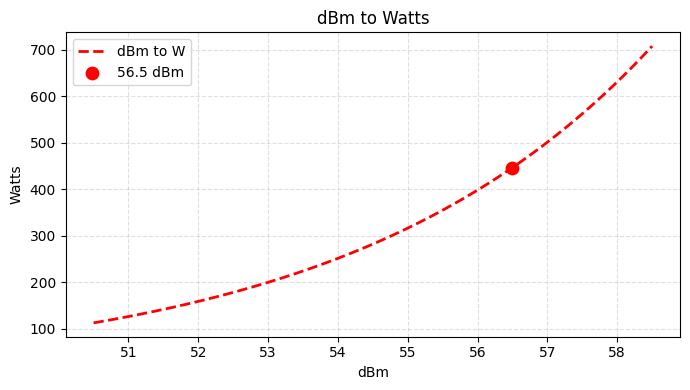

In [7]:
# Convert from dBm to Watts and plot the conversion curve
try:
    example_dbm_watt_conversions(56.5, mode="dbm", plot=True)
except ValueError as e:
    print(f"⚠️ Warning: {e}")

🔁 1000 W = 60.00 dBm


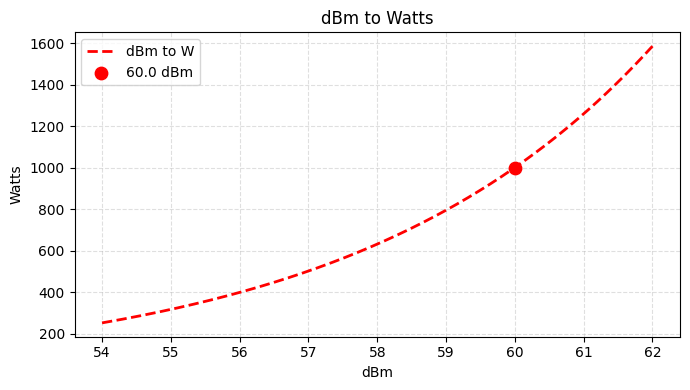

In [8]:
# Convert from Watts to dBm and plot the conversion curve
try:
    example_dbm_watt_conversions(1000, mode="watts", plot=True)
except ValueError as e:
    print(f"⚠️ Warning: {e}")

In [9]:
# Convert from Watts to dBm with an invalid value (negative value)
try:
    example_dbm_watt_conversions(-10, mode="watts")
except ValueError as e:
    print(f"⚠️ Warning: {e}")

⚠️ Warning: Power in watts must be greater than zero.


In [10]:
# Convert from dBm to Watts with an invalid value (over 110 dBm)
try:
    example_dbm_watt_conversions(120, mode="dbm")
except ValueError as e:
    print(f"⚠️ Warning: {e}")

⚠️ Warning: Input exceeds 110 dBm (100 MW). Value is outside practical range.
